# Library

In [1]:
import numpy as np
import math
import os
import sys
import scipy
from scipy.signal import argrelextrema, correlate2d
from scipy.misc import imresize
from scipy import ndimage
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
%matplotlib inline

# Utilities 

In [2]:
class Vars() :
    def __init__(self) :
        self.handler = {}
        
    def get(self, key) :
        return self.handler[key]
    
    def put(self, key, value) :
        self.handler[key] = value

In [3]:
def load_image(a, var) :
    return ndimage.imread(var.get('data_dir') + a['cat'] + "/" + a['name'])

In [4]:
def rgb2gray(img):
    return np.dot(img[...,:3], [0.299, 0.587, 0.114])

In [5]:
def make_data_dir(dir_path, cats) :
# Make data dir
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)
    for c in cats :
        if not os.path.exists(dir_path + c):
            os.makedirs(dir_path + c)
    if not os.path.exists(dir_path + "NORMAL"):
        os.makedirs(dir_path + "NORMAL")

# Data Loading

In [6]:
# Prepare variables
V = Vars()
V.put('data_dir', os.getcwd() + "/../full_data/")
V.put('data_dir_cell', os.getcwd() + "/../full_data_cell/")
V.put('data_dir_cell_back_rm', os.getcwd() + "/../full_data_cell_bgrm/")
V.put('data_dir_cell_unscale', os.getcwd() + "/../cell_unscale/")
V.put('cell_x', 140)
V.put('cell_y', 280)
V.put('tmp_x', 138)
V.put('tmp_y', 270)
# V.put('image_x', 2456)
# V.put('image_y', 2058)

In [7]:
import glob
# Loading Image & Error
# dataDir = os.getcwd() + "/../full_data/"
cats = os.listdir(V.get('data_dir'))
for c in cats :
    if not filter(os.path.isdir, glob.glob(V.get('data_dir') + c)) :
         cats.remove(c)
cats.remove("shchoi")
cats.remove("others")
cats.remove("Template3.bmp")
cats.remove("full_data_cell_bgrm_only_jpg")
print cats

anns = {}

cnt = 0
for c in cats :
    for name in os.listdir(V.get('data_dir') + c):
        if name.split('.')[-1] == "jpg" :
#         img = ndimage.imread(dataDir + c + "/" + name).astype(float)
            anns[name] = {'name':name, 'cat':c}

f = open(V.get('data_dir') + "error_xy.txt", 'r')
# f = open(V.get('data_dir') + "file_list.txt", 'r')
errLines = f.readlines()
# cnt = 0
for i, l in enumerate(errLines) :
    tokens = l.split(':')[-2:]
    c, name = tokens[0].split('\\')[-2:]
    if name in anns :
        err = tokens[1][:-3].replace(')','').replace('(','').replace(']','').replace('[',',').split(',')
        if len(err) > 1 :
            anns[name]['err'] = map(int, err)
#     else :
#         cnt += 1
%time

OSError: [Errno 2] No such file or directory: '/SD/../full_data/'

In [14]:
print tokens
print c, name
print err
print anns[name]['err']

['\\Debug\\A2MR_SDR_21LOT_\xba\xd2\xb7\xae\xba\xb0\\\xc6\xf2\xb0\xa1\\TI_YUSIL\\A2MR1S71RMHA6.A2MR1S71RMHCD125.026_20170130175117.jpg', '(1240,1251[1155,1097]),\r\n']
TI_YUSIL A2MR1S71RMHA6.A2MR1S71RMHCD125.026_20170130175117.jpg
['1240', '1251', '1155', '1097']
[1240, 1251, 1155, 1097]


In [15]:
cnt = 0
for a in anns.values() :
    if not 'err' in a :
        print a['name'], a['cat']
        cnt += 1
print cnt

A2MR1S71OKFA9.A2MR1S71OKFAA055.025_20170130144440.jpg BLACK_SPOT
A2MR1S71QWGA4.A2MR1S71QWGAD053.033_20170131160312.jpg PTN_ERR
A2MR1S71PKQA1.A2MR1S71PKQAA080.050_20170131142629.jpg PASS
A2MR1S71QF3A7.A2MR1S71QF3AD034.022_20170202035536.jpg PASS
A2MR1S71OG1A4.A2MR1S71OG1BC042.052_20170130022312.jpg BLACK_SPOT
A2MR1S71PNFA3.A2MR1S71PNFCB096.014_20170131165955.jpg PASS
A2MR1S71OGHA7.A2MR1S71OGHCB146.013_20170130040520.jpg PASS
A2MR1S71PHIA0.A2MR1S71PHIAD037.029_20170130120342.jpg PASS
A2MR1S71PN4A5.A2MR1S71PN4CA132.027_20170131163702.jpg BLACK_SPOT
A2MR1S71LK3A7.A2MR1S71LK3DA168.000_20170130170014.jpg PASS
A2MR1S71NGRA6.A2MR1S71NGRDD115.052_20170129180843.jpg SD_SPOT
A2MR1S71QBDA0.A2MR1S71QBDBA080.055_20170201101652.jpg CORROSION
A2MR1S71QF3A7.A2MR1S71QF3AD067.023_20170202035537.jpg PASS
A2MR1S71MWPA9.A2MR1S71MWPCA169.017_20170131014831.jpg HOLE_PTN_ERR
A2MR1S71NPCA0.A2MR1S71NPCAC069.033_20170201024906.jpg BLACK_SPOT
A2MR1S71QA5A4.A2MR1S71QA5BA017.031_20170130200537.jpg PASS
A2MR1S71LKKA1

In [16]:
cnt = np.zeros(70, dtype=np.int32)
test_a = 0
test_b = 0
for a in anns.values() :
    if 'err' in a :
        l = len(a['err'])/4
#         if l > 9 :
#             l = 9
        cnt[l] += 1
        test_a += 1
    else :
        test_b += 1
print cnt

[    0 28814  5675   940   754   281   164    84    59    32    44    19
    17    10    13     9    10     7     7     5     6     2     5     4
     2     4     1     0     1     1     2     1     0     0     2     2
     0     1     1     0     0     2     1     2     1     0     0     0
     1     0     0     0     1     0     0     0     0     0     0     0
     0     1     0     0     0     0     0     0     0     0]


# Template Matching

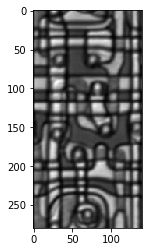

In [8]:
# Make Template
# idx = np.random.randint(len(anns))
# a = anns.values()[idx]
# tmp = a['img_gray'][:280,:140].reshape(280, 140, 1, 1)
tmp = ndimage.imread(V.get('data_dir') + "Template3.bmp")
# tmp = imresize(tmp, (72, 230))
tmp_gray = rgb2gray(tmp)
tmp_gray -= np.mean(tmp_gray)
plt.imshow(tmp_gray, cmap='gray')

# reshaping for convolution
tmp_y, tmp_x = tmp_gray.shape
tmp_gray = tmp_gray.reshape(tmp_y, tmp_x, 1, 1)

In [9]:
X = tf.placeholder(tf.float32, name="Image")
t = tf.placeholder(tf.float32, name="Template")
# t = tf.constant(tmp_gray, dtype=tf.float32)
match = tf.nn.conv2d(X, t, strides=[1,1,1,1], padding='VALID')
# match = tf.metrics.mean_squared_error(X, t)
# init = tf.global_variables_initializer()
sess = tf.Session(config=tf.ConfigProto(gpu_options=tf.GPUOptions(allow_growth=True)))
sess.run(tf.global_variables_initializer())
sess.run(tf.local_variables_initializer())

In [10]:
# Overall crop operation
from ipywidgets import FloatProgress
from IPython.display import display
import random
from matplotlib.patches import Circle

cell_x = V.get('cell_x')
cell_y = V.get('cell_y')
tmp_x = V.get('tmp_x')
tmp_y = V.get('tmp_y')
# n = 48
f = FloatProgress(min=0, max=len(anns))
display(f)
deno = 100
# fig, ax = plt.subplots(4, 12, figsize=(30, 20))
# ann_list = anns.values()
# random.shuffle(ann_list)
anns_cell = {}
for i, a in enumerate(anns.values()) :
    img = load_image(a, V) # load image
    img_gray = rgb2gray(img) # convert to gray
    
    # infer scale and resize
    row = img_gray[:10,:]
    row = row.reshape(-1, row.shape[0], row.shape[1], 1)
    row_tmp = row[:,:,:tmp_x,:].reshape(row.shape[1], tmp_x, 1, 1)
    row_tmp -= np.mean(row_tmp)
    horCorr = np.squeeze(sess.run(match, feed_dict={X:row, t:row_tmp}))
    
    col = img_gray[:,:10]
    col = col.reshape(-1, col.shape[0], col.shape[1], 1)
    col_tmp = col[:,:tmp_y,:,:].reshape(tmp_y, col.shape[2], 1, 1)
    col_tmp -= np.mean(col_tmp)
    verCorr = np.squeeze(sess.run(match, feed_dict={X:col, t:col_tmp}))
    
    horIdx = []
    verIdx = []
    for j in range(horCorr.size/tmp_x):
        horIdx.append(j*tmp_x + np.argmax(horCorr[j*tmp_x:(j+1)*tmp_x]))
    horIdx.append((j+1)*tmp_x + np.argmax(horCorr[(j+1)*tmp_x:]))
    scale_x = ((j+1)*cell_x)/float(horIdx[-1])
    for j in range(verCorr.size/tmp_y):
        verIdx.append(j*tmp_y + np.argmax(verCorr[j*tmp_y:(j+1)*tmp_y]))
    verIdx.append((j+1)*tmp_y + np.argmax(verCorr[(j+1)*tmp_y:]))
    scale_y = ((j+1)*cell_y)/float(verIdx[-1])
    
    img = imresize(img, (int(img.shape[0]*scale_y), int(img.shape[1]*scale_x)))
    img_gray = rgb2gray(img)
    img_sub = img_gray[:tmp_y + V.get('cell_y') - 1, :tmp_x + V.get('cell_x') - 1] # crop subset
    img_sub = img_sub.reshape(-1, img_sub.shape[0], img_sub.shape[1], 1)
    slcNumX = img.shape[1]/140 - 1
    slcNumY = img.shape[0]/280 - 1
    
    # calculate convolution
    corr_o = sess.run(match, feed_dict={X:img_sub, t:tmp_gray})
    corr_o = corr_o.reshape(corr_o.shape[1], corr_o.shape[2])
    
    # infer offset
    offset_y, offset_x = np.unravel_index(np.argmax(corr_o), corr_o.shape)
    offset_y += tmp_y/2
    if offset_y < cell_y/2 :
        offset_y += cell_y
    if offset_y > cell_y*1.5 :
        offset_y -= cell_y
    offset_x += tmp_x/2
    if offset_x < cell_x/2 :
        offset_x += cell_x
    if offset_x > cell_x*1.5 :
        offset_x -= cell_x
    offset_y -= cell_y/2
    offset_x -= cell_x/2

    # slice
    slc = [ [x for x in range(slcNumX)] for y in range(slcNumY) ]
    for j in range(slcNumY) :
        for k in range(slcNumX) :
            slc[j][k] = img[offset_y+280*j:offset_y+280*(j+1), offset_x+140*k:offset_x+140*(k+1), :]
#             slc[j][k] = img[]
#     a['slc_offset'] = slc

    id_x = np.random.randint(slcNumX)
    id_y = np.random.randint(slcNumY)
    ax[i/12,i%12].imshow(slc[id_y][id_x])
#     ax[i/12,i%12].imshow(slc[0][0])
    
    # Make data dir
    if not os.path.exists(V.get('data_dir_cell')):
        os.makedirs(V.get('data_dir_cell'))
    for c in cats :
        if not os.path.exists(V.get('data_dir_cell') + c):
            os.makedirs(V.get('data_dir_cell') + c)
    if not os.path.exists(V.get('data_dir_cell') + "NORMAL"):
        os.makedirs(V.get('data_dir_cell') + "NORMAL")
            
    # Find Error Slice
    if 'err' in a.keys() :
        e = a['err']#.replace(')','').replace('(','').split(',')
    else :
        e = []
    if len(e) > 0 :
        for j in range(len(e)/4) :
            loc_error_x = int(e[4*j]*scale_x - offset_x)/140
            loc_error_y = int(e[4*j+1]*scale_y - offset_y)/280
#             loc_error_x_check = int(e[4*j+2]*scale_x - offset_x)/140
#             loc_error_y_check = int(e[4*j+3]*scale_y - offset_y)/280
#             if loc_error_x != loc_error_x_check or loc_error_y != loc_error_y_check :
#                 print e
#                 print loc_error_x, loc_error_x_check, loc_error_y, loc_error_y_check
#                 print offset_x + 140*loc_error_x, int(e[4*j]*scale_x), int(e[4*j+2]*scale_x), scale_x
#                 print offset_y + 280*loc_error_y, int(e[4*j+1]*scale_y), int(e[4*j+3]*scale_y), scale_y
            if loc_error_x < slcNumX and loc_error_y < slcNumY :
                cell_name = V.get('data_dir_cell') + a['cat'] + "/" + a['name'][:-4] + "_%d"%j + ".png"
#                 anns_cell[cell_name] = (int((e[2*j]*scale_x - offset_x))%140, int((e[2*j+1]*scale_y - offset_y))%280)
                png = Image.fromarray(slc[loc_error_y][loc_error_x])
                png.save(cell_name, "png")

#     png = Image.fromarray(slc[0][0])
#     png.save(V.get('data_dir_cell') + "NORMAL/" + a['name'][:-4] + ".png", "png")
    # save slice
    
    # Confirm slice with error
#     print a['cat']
#     fig, ax = plt.subplots(slcNumY, slcNumX, figsize=(30, 20))
#     for j in range(slcNumY) :
#         for k in range(slcNumX) :
#             ax[j,k].imshow(slc[j][k])
#             if a['is_err_offset'][j, k] == 1 :
#                 circ = Circle((x,y), 20, color='r')
#                 ax[j,k].add_patch(circ)
    f.value = i+1
# pickle.dump(anns_cell, open(V.get('data_dir_cell') + "cell_xy.p", "wb"))

In [47]:
# Crop by recorded xy
cell_x = V.get('cell_x')
cell_y = V.get('cell_y')
tmp_x = V.get('tmp_x')
tmp_y = V.get('tmp_y')
data_dir = V.get('data_dir_cell_unscale')
f = FloatProgress(min=0, max=len(anns))
display(f)
# fig, ax = plt.subplots(4, 12, figsize=(30, 20))
for i, a in enumerate(anns.values()) :
    make_data_dir(data_dir, cats)
    img = load_image(a, V) # load image
    if 'err' in a.keys() :
        e = a['err']#.replace(')','').replace('(','').split(',')
    else :
        e = []
    if len(e) > 0 :
        for j in range(len(e)/4) :
            cell_err = img[e[4*j+3]:e[4*j+3]+280, e[4*j+2]:e[4*j+2]+140, :]
            err_x = e[4*j] - e[4*j+2]
            err_y = e[4*j+1] - e[4*j+3]
            cell_name = data_dir + a['cat'] + "/" + a['name'][:-4] + "_%d"%j + ".png"
            png = Image.fromarray(cell_err)
            png.save(cell_name, "png")
#             ax[i/12,i%12].imshow()
#             anns_cell[cell_name] = (err_x, err_y)
    
    png = Image.fromarray(img[:cell_y, :cell_x, :])
    png.save(data_dir + "NORMAL/" + a['name'][:-4] + ".png", "png")
    
    f.value = i+1

In [44]:
import pickle
pickle.dump(anns_cell, open(V.get('data_dir_cell_unscale') + "cell_xy.p", "wb"))

In [45]:
print len(anns_cell)

52851


In [ ]:
# Overall crop operation (background removal version)
# from progress.bar import Bar
from ipywidgets import FloatProgress
from IPython.display import display
import random
from matplotlib.patches import Circle

# n = 48
data_dir = V.get('data_dir_cell_back_rm')
cell_x = V.get('cell_x')
cell_y = V.get('cell_y')
tmp_x = V.get('tmp_x')
tmp_y = V.get('tmp_y')
f = FloatProgress(min=0, max=len(anns))
display(f)
cnt_island = 0
# fig, ax = plt.subplots(4, 12, figsize=(30, 20))
# ann_list = anns.values()
# random.shuffle(ann_list)
for i, a in enumerate(anns.values()) :
    img = load_image(a, V) # load image
    img_gray = rgb2gray(img) # convert to gray
    
    # infer scale and resize
    row = img_gray[:10,:]
    row = row.reshape(-1, row.shape[0], row.shape[1], 1)
    row_tmp = row[:,:,:tmp_x,:].reshape(row.shape[1], tmp_x, 1, 1)
    row_tmp -= np.mean(row_tmp)
    horCorr = np.squeeze(sess.run(match, feed_dict={X:row, t:row_tmp}))
    
    col = img_gray[:,:10]
    col = col.reshape(-1, col.shape[0], col.shape[1], 1)
    col_tmp = col[:,:tmp_y,:,:].reshape(tmp_y, col.shape[2], 1, 1)
    col_tmp -= np.mean(col_tmp)
    verCorr = np.squeeze(sess.run(match, feed_dict={X:col, t:col_tmp}))
    
    horIdx = []
    verIdx = []
    for j in range(horCorr.size/tmp_x):
        horIdx.append(j*tmp_x + np.argmax(horCorr[j*tmp_x:(j+1)*tmp_x]))
    horIdx.append((j+1)*tmp_x + np.argmax(horCorr[(j+1)*tmp_x:]))
    scale_x = ((j+1)*cell_x)/float(horIdx[-1])
    for j in range(verCorr.size/tmp_y):
        verIdx.append(j*tmp_y + np.argmax(verCorr[j*tmp_y:(j+1)*tmp_y]))
    verIdx.append((j+1)*tmp_y + np.argmax(verCorr[(j+1)*tmp_y:]))
    scale_y = ((j+1)*cell_y)/float(verIdx[-1])
    
    img = imresize(img, (int(img.shape[0]*scale_y), int(img.shape[1]*scale_x)))
    img_gray = rgb2gray(img)
    img_sub = img_gray[:tmp_y + cell_y - 1, :tmp_x + cell_x - 1] # crop subset
    img_sub = img_sub.reshape(-1, img_sub.shape[0], img_sub.shape[1], 1)
    slc_num_x = img.shape[1]/140 - 1
    slc_num_y = img.shape[0]/280 - 1
    
    # calculate convolution
    corr_o = sess.run(match, feed_dict={X:img_sub, t:tmp_gray})
    corr_o = corr_o.reshape(corr_o.shape[1], corr_o.shape[2])
    
    # infer offset
    offset_y, offset_x = np.unravel_index(np.argmax(corr_o), corr_o.shape)
    offset_y += tmp_y/2
    if offset_y < cell_y/2 :
        offset_y += cell_y
    if offset_y > cell_y*1.5 :
        offset_y -= cell_y
    offset_x += tmp_x/2
    if offset_x < cell_x/2 :
        offset_x += cell_x
    if offset_x > cell_x*1.5 :
        offset_x -= cell_x
    offset_y -= cell_y/2
    offset_x -= cell_x/2

    # error loading
    if 'err' in a.keys() :
        e = a['err']#.replace(')','').replace('(','').split(',')
    else :
        e = []
    is_err = np.zeros((slcNumY, slcNumX))
    if len(e) > 0 :
        for j in range(len(e)/2) :
            loc_error_x = int(e[2*j]*scale_x - offset_x)/140
            loc_error_y = int(e[2*j+1]*scale_y - offset_y)/280
            if loc_error_x < slcNumX and loc_error_y < slcNumY :
                is_err[loc_error_y, loc_error_x] = 1
    
    # Make data dir
    if not os.path.exists(data_dir):
        os.makedirs(data_dir)
    for c in cats :
        if not os.path.exists(data_dir + c):
            os.makedirs(data_dir + c)
    if not os.path.exists(data_dir + "NORMAL"):
        os.makedirs(data_dir + "NORMAL")
            
    # Find Error Slice
    if len(e) > 0 :
        for j in range(len(e)/2) :
            loc_error_x = int(e[2*j]*scale_x - offset_x)/140
            loc_error_y = int(e[2*j+1]*scale_y - offset_y)/280
            if 0 <= loc_error_x < slcNumX and 0 <= loc_error_y < slcNumY :
                (is_not_island, cell_bgrm) = bgrm_4near(img, loc_error_x, loc_error_y, offset_x, offset_y, 
                                       cell_x, cell_y, slc_num_x, slc_num_y, is_err)
                if is_not_island :
#                     ax[i/12,i%12].imshow(cell_bgrm)#, vmax=255, vmin=0)
                    png = Image.fromarray(cell_bgrm)
                    png.save("{}{}/{}_{}{}".format(data_dir, a['cat'], a['name'][:-4], j, ".png"), "png")
                else :
                    cnt_island += 1
                    
    is_not_island, cell_bgrm = bgrm_4near(img, 0, 0, offset_x, offset_y, 
                           cell_x, cell_y, slc_num_x, slc_num_y, is_err)
    if is_not_island :
        png = Image.fromarray(cell_bgrm)
        png.save(data_dir + "NORMAL/" + a['name'][:-4] + ".png", "png")
    
    f.value = i+1
print cnt_island

In [74]:
print cnt_island

455


In [44]:
def bgrm_4near(img, x, y, offset_x, offset_y, cell_x, cell_y, slc_num_x, slc_num_y, is_err) :
    slc = [ [i for i in range(3)] for j in range(3) ]
    for j in range(y-1, y+2) :
        for k in range(x-1, x+2) :
            slc[j-(y-1)][k-(x-1)] = img[offset_y+280*j:offset_y+280*(j+1), offset_x+140*k:offset_x+140*(k+1), :]
    baseSlc = np.zeros((cell_y, cell_x, 3), dtype=np.float32)
    cnt = 0
    if y-1 >= 0 :
        if is_err[y-1][x] == 0 :
            baseSlc = baseSlc + slc[0][1]
            cnt += 1
    if y+1 < slc_num_y :
        if is_err[y+1][x] == 0 :
            baseSlc = baseSlc + slc[2][1]
            cnt += 1
    if x-1 >= 0 :
        if is_err[y][x-1] == 0 :
            baseSlc = baseSlc + slc[1][0]
            cnt += 1
    if x+1 < slc_num_x :
        if is_err[y][x+1] == 0 :
            baseSlc = baseSlc + slc[1][2]
            cnt += 1
    if cnt == 0 :
        return False, None
    else :
        baseSlc = baseSlc/cnt
        return True, abs(slc[1][1] - baseSlc).astype(np.uint8) 

In [41]:
print slcCompSub[0][0].dtype

float64


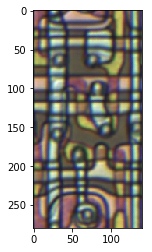

In [47]:
from PIL import Image
plt.imshow(anns.values()[0]['slc_offset'][0][0])
bmp = Image.fromarray(anns.values()[0]['slc_offset'][0][0])
bmp.save(V.get('dataDir') + "Template3.bmp", "bmp")

[[  1.11513848e+08   1.13401128e+08   1.14840168e+08 ...,   1.15765872e+08
    1.15762992e+08   1.15874816e+08]
 [  1.14365864e+08   1.16241264e+08   1.17659824e+08 ...,   1.18404112e+08
    1.18352360e+08   1.18405712e+08]
 [  1.14949792e+08   1.16771192e+08   1.18133744e+08 ...,   1.18727896e+08
    1.18668976e+08   1.18706304e+08]
 ..., 
 [  1.09752952e+08   1.11416016e+08   1.12725296e+08 ...,   1.17098376e+08
    1.16918280e+08   1.16853664e+08]
 [  1.10947392e+08   1.12633600e+08   1.13981264e+08 ...,   1.17641608e+08
    1.17450832e+08   1.17387512e+08]
 [  1.12147856e+08   1.13842432e+08   1.15204848e+08 ...,   1.18184136e+08
    1.17984984e+08   1.17916200e+08]]


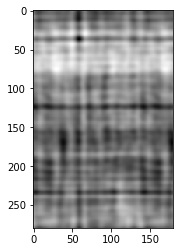

In [67]:
print anns.values()[0]['corr_tmp']
plt.imshow(anns.values()[0]['corr_tmp'], cmap='gray_r')

# Compare

In [15]:
# subtract by 4 near slice
# compSlcs = []
# horIter = len(horIdx)-1
# verIter = len(verIdx)-1
# fig, ax = plt.subplots(verIter-2, horIter-2, figsize=(7,10))
for a in anns.values() :
    slcCompSub = [ [x for x in range(1, slcNumX-1)] for y in range(1, slcNumY-1) ]
    slc = a['slc']
    is_err = a['is_err']
    for i in range(1, slcNumY-1):
        for j in range(1, slcNumX-1):
            if is_err[i][j] == 0 :
                baseSlc = 0
                cnt = 0
                if is_err[i-1][j] == 0 :
                    baseSlc += slc[i-1][j]
                    cnt += 1
                if is_err[i+1][j] == 0 :
                    baseSlc += slc[i+1][j]
                    cnt += 1
                if is_err[i][j-1] == 0 :
                    baseSlc += slc[i][j-1]
                    cnt += 1
                if is_err[i][j+1] == 0 :
                    baseSlc += slc[i][j+1]
                    cnt += 1
#             baseSlc = (slc[i-1][j] + slc[i+1][j] + slc[i][j-1] + slc[i][j+1])/4
                baseSlc = baseSlc/cnt
                slcCompSub[i-1][j-1] = abs(slc[i][j] - baseSlc)
            else :
                slcCompSub[i-1][j-1] = np.zeros((resizeY, resizeX))
                
    a['slcCompSub'] = slcCompSub
# plt.savefig('compareGrayAround_resize.png')
# print np.max(abs(currImg - baseImg))/255

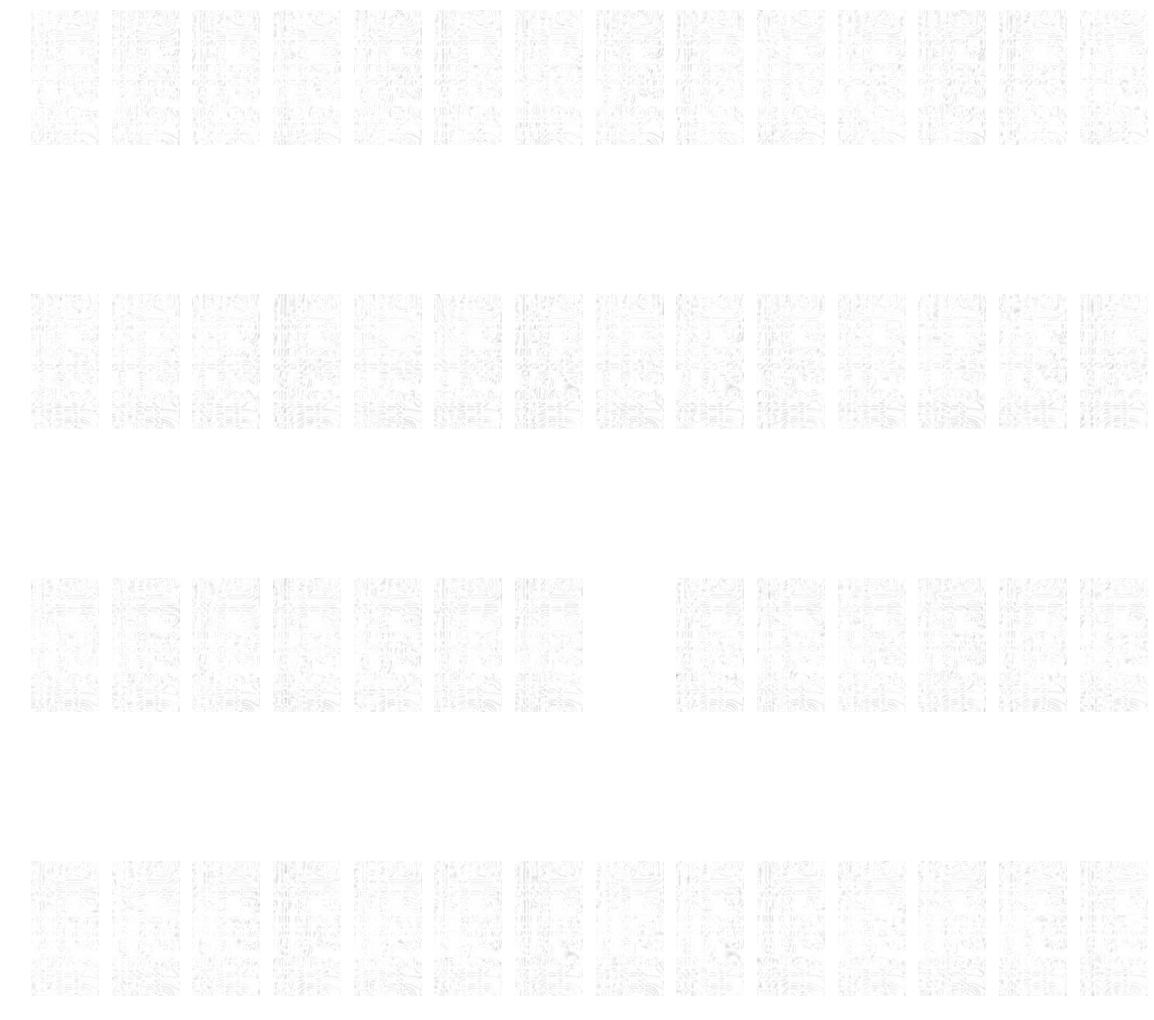

In [33]:
# visualize
idx = np.random.randint(len(anns))
a = anns.values()[idx]
is_err = a['is_err']
slcCompSub = a['slcCompSub']
fig, ax = plt.subplots(slcNumY-2, slcNumX-2, figsize=(20,20))
for i in range(1, slcNumY-1):
    for j in range(1, slcNumX-1):
        if is_err[i][j] == 0 :
            try :
                ax[i-1,j-1].imshow(slcCompSub[i-1][j-1], vmin=0, vmax=255, cmap='gray_r')
            except :
                print i, j, is_err
#         else :
#             slcCompAvg[i][j] = -1
        ax[i-1,j-1].axis('off')

# plt.savefig('compareGrayAvg_resize.png')
# print np.max(abs(currImg - baseImg))/255